In [7]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns 

In [35]:
df = pd.read_csv(r'Test.csv', escapechar='\n')
df.to_csv('data.tsv', sep='\t', encoding='utf-8', index=False)
df =pd.read_csv('data.tsv', sep='\t')
df.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [36]:
customStopwords = stopwords.words('english')
customStopwords.append('br')

In [37]:
def Preprocessing(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    text = [w for w in text.split(' ') if w not in customStopwords]
    text = [WordNetLemmatizer().lemmatize(token) for token in text]
    text = [WordNetLemmatizer().lemmatize(token,pos='v') for token in text]
    text = " ".join(text)
    return text

df['text'] = df.text.apply(lambda x:Preprocessing(x))

In [38]:
sid=SentimentIntensityAnalyzer()
df['scores']=df['text'].apply(lambda Text: sid.polarity_scores(Text))
df.head()

,text,label,scores
0,always write series complete stinkfest jim bel...,0,"{'neg': 0.043, 'neu': 0.753, 'pos': 0.204, 'co..."
1,1st watch 1272002 3 10dirsteve purcell typica...,0,"{'neg': 0.08, 'neu': 0.703, 'pos': 0.218, 'com..."
2,movie poorly write direct fell asleep 30 minut...,0,"{'neg': 0.299, 'neu': 0.469, 'pos': 0.231, 'co..."
3,interest thing miryang secret sunshine actor j...,1,"{'neg': 0.186, 'neu': 0.644, 'pos': 0.17, 'com..."
4,first read berlin meer didnt expect much think...,0,"{'neg': 0.169, 'neu': 0.679, 'pos': 0.152, 'co..."


In [39]:
df['compound']=df['scores'].apply(lambda score_dict:score_dict['compound'])
df.head()

,text,label,scores,compound
0,always write series complete stinkfest jim bel...,0,"{'neg': 0.043, 'neu': 0.753, 'pos': 0.204, 'co...",0.9879
1,1st watch 1272002 3 10dirsteve purcell typica...,0,"{'neg': 0.08, 'neu': 0.703, 'pos': 0.218, 'com...",0.9233
2,movie poorly write direct fell asleep 30 minut...,0,"{'neg': 0.299, 'neu': 0.469, 'pos': 0.231, 'co...",-0.9120
3,interest thing miryang secret sunshine actor j...,1,"{'neg': 0.186, 'neu': 0.644, 'pos': 0.17, 'com...",-0.8764
4,first read berlin meer didnt expect much think...,0,"{'neg': 0.169, 'neu': 0.679, 'pos': 0.152, 'co...",-0.4496


In [40]:
df['comp_score']=df['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
df.head()

,text,label,scores,compound,comp_score
0,always write series complete stinkfest jim bel...,0,"{'neg': 0.043, 'neu': 0.753, 'pos': 0.204, 'co...",0.9879,pos
1,1st watch 1272002 3 10dirsteve purcell typica...,0,"{'neg': 0.08, 'neu': 0.703, 'pos': 0.218, 'com...",0.9233,pos
2,movie poorly write direct fell asleep 30 minut...,0,"{'neg': 0.299, 'neu': 0.469, 'pos': 0.231, 'co...",-0.9120,neg
3,interest thing miryang secret sunshine actor j...,1,"{'neg': 0.186, 'neu': 0.644, 'pos': 0.17, 'com...",-0.8764,neg
4,first read berlin meer didnt expect much think...,0,"{'neg': 0.169, 'neu': 0.679, 'pos': 0.152, 'co...",-0.4496,neg


In [41]:
 df['label_score']=df['label'].apply(lambda x: 'neg' if (x==0) else 'pos')

df.head()

,text,label,scores,compound,comp_score,label_score
0,always write series complete stinkfest jim bel...,0,"{'neg': 0.043, 'neu': 0.753, 'pos': 0.204, 'co...",0.9879,pos,neg
1,1st watch 1272002 3 10dirsteve purcell typica...,0,"{'neg': 0.08, 'neu': 0.703, 'pos': 0.218, 'com...",0.9233,pos,neg
2,movie poorly write direct fell asleep 30 minut...,0,"{'neg': 0.299, 'neu': 0.469, 'pos': 0.231, 'co...",-0.9120,neg,neg
3,interest thing miryang secret sunshine actor j...,1,"{'neg': 0.186, 'neu': 0.644, 'pos': 0.17, 'com...",-0.8764,neg,pos
4,first read berlin meer didnt expect much think...,0,"{'neg': 0.169, 'neu': 0.679, 'pos': 0.152, 'co...",-0.4496,neg,neg


In [42]:
print(classification_report(df['label_score'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.78      0.51      0.61      2495
         pos       0.63      0.85      0.73      2505

    accuracy                           0.68      5000
   macro avg       0.71      0.68      0.67      5000
weighted avg       0.70      0.68      0.67      5000



In [43]:
print('Sistemos nustatytas įvertinimas:\n', df['label_score'].value_counts())
print('\n VENDER modeliu nustatytas įvertinimas:\n',df['comp_score'].value_counts())

Sistemos nustatytas įvertinimas:
 pos    2505
neg    2495
Name: label_score, dtype: int64

 VENDER modeliu nustatytas įvertinimas:
 pos    3376
neg    1624
Name: comp_score, dtype: int64


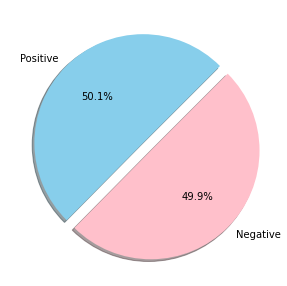

In [44]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=df[df['label_score']=='pos']
neg=df[df['label_score']=='neg']
ck=[pos['label_score'].count(),neg['label_score'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))


C:\Users\gabriele.vaitkeviciu\Anaconda3\envs\nlp_vu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_score', ylabel='count'>

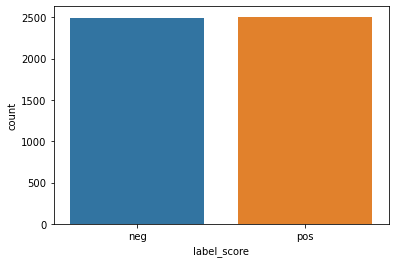

In [45]:
sns.countplot(df['label_score'])


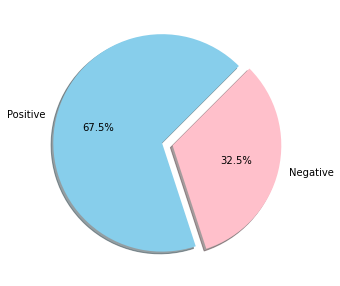

In [46]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=df[df['comp_score']=='pos']
neg=df[df['comp_score']=='neg']
ck=[pos['comp_score'].count(),neg['comp_score'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

C:\Users\gabriele.vaitkeviciu\Anaconda3\envs\nlp_vu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='comp_score', ylabel='count'>

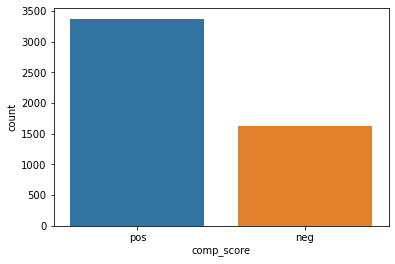

In [47]:
sns.countplot(df['comp_score'])


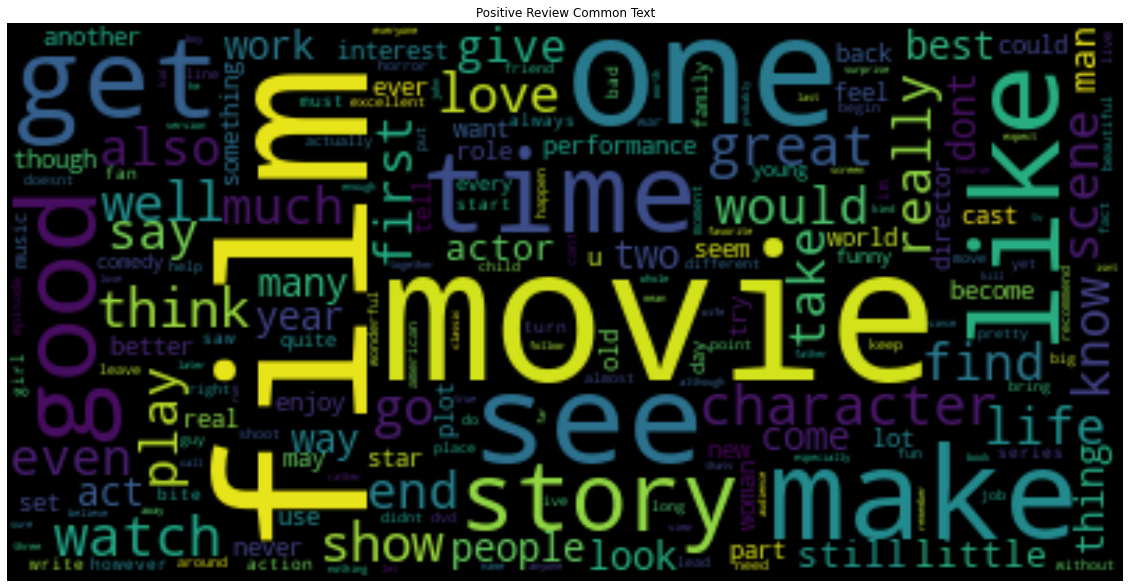

In [48]:
plt.figure(figsize=(20,20))
pos_freq = FreqDist(' '.join(df[df['label'] == 1].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=pos_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()

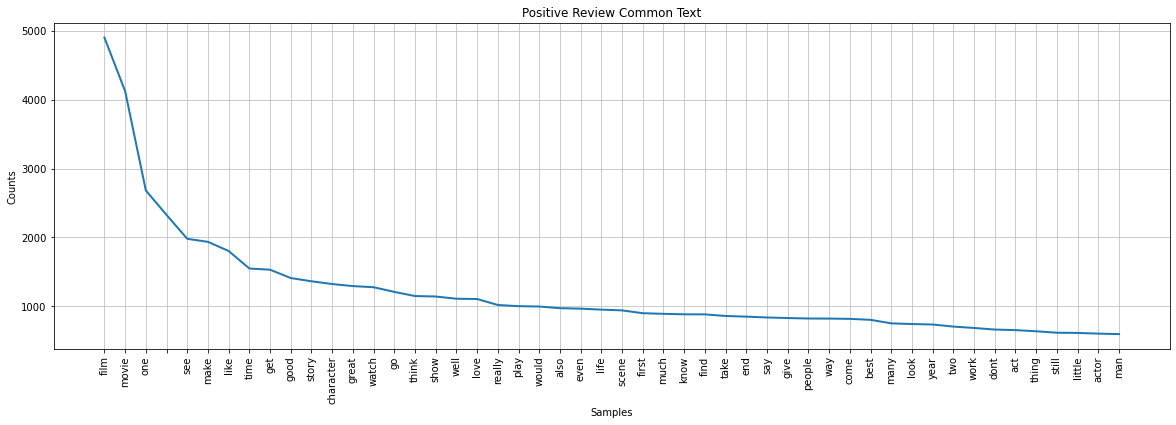

In [50]:
plt.figure(figsize=(20,6))
pos_freq.plot(50,cumulative=False,title='Positive Review Common Text')
plt.show()

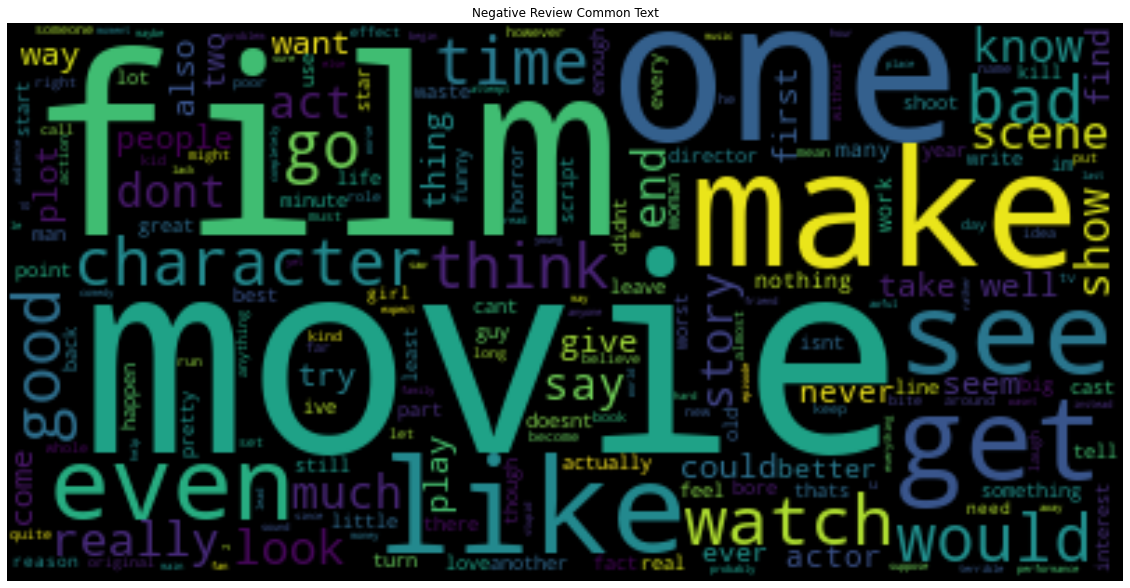

In [51]:
plt.figure(figsize=(20,20))
neg_freq = FreqDist(' '.join(df[df['label'] == 0].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=neg_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Negative Review Common Text')
plt.axis('off')
plt.show()

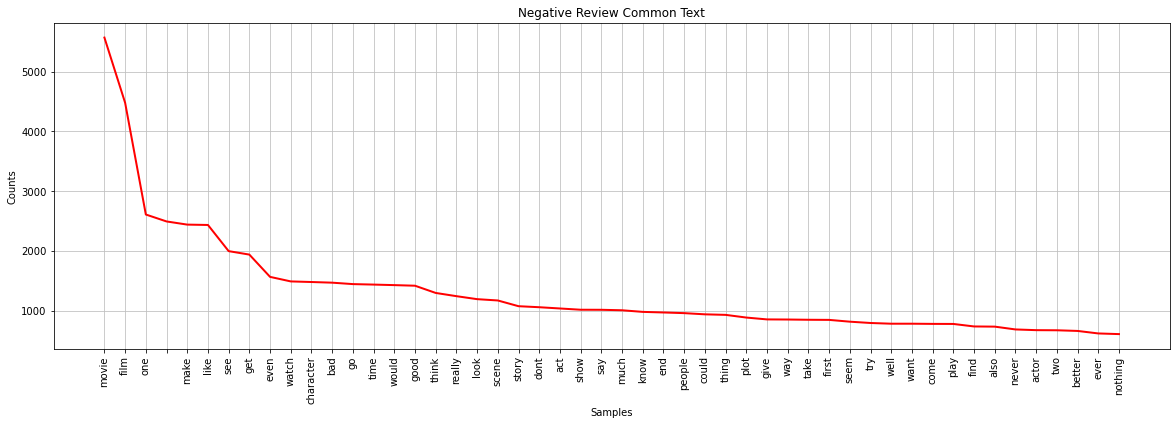

In [52]:
plt.figure(figsize=(20,6))
neg_freq.plot(50,cumulative=False,title='Negative Review Common Text',color='red')
plt.show()